In [71]:
import numpy as np
import pylab as plb
import random as rand
from matplotlib import colors
plb.rcParams['figure.figsize'] =12,20 # change this figures to have a clearer figure :)


N = 150     # The number of Rooms
t = 4000000  # Hom many seeds?
d = 1       # Iteration of Code
StopNo = 30  #number of stops
cmap = colors.ListedColormap(['white', 'black','blue']) #color map
Samples = []
Stops = np.array([t/(1.4**k) for k in range(StopNo,-1,-1)],int)
Hs , Ws =[] , []
print(Stops)

def Visualize(xAxis,width,n,*args):
    global StopNo
    global Stops
    # all of this code is devoted just to draw the lattice colorful
    for ar in args:
        for li in ar:
            li.remove(0)
    Cuts = []
    for i,f in enumerate(args):
        if i == 0:
            Cuts.append(f[:])
        else:
            Cuts.append([])
            for h,elem in enumerate(f): 
                NewArray = np.array(elem[len(args[i-1][h]):])
                NewArray[NewArray == 1] = i%2 +1
                Cuts[-1].append(NewArray.tolist())
    Data = []
    for i in range(N):
        TempArr = []
        for f in Cuts:
            TempArr += f[i]
        Data.append(TempArr)
    global cmap
    maX = max([len(dt) for dt in Data])
    for dat in Data:
        while len(dat)<maX:
            dat.append(0)

    plb.imshow(np.array(Data).T,cmap=cmap,origin= [0,1])
    plb.title("The distribution of particles in all Places",fontsize=16)
    plb.xlabel("Place",fontsize=14)
    plb.ylabel("The height of Particles",fontsize=14)
    plb.show()
    
def Find_Near(r,N,Rooms):
    Set = { len(Rooms[r-1]) , len(Rooms[r]), len(Rooms[(r+1)%N]) }
    maxh = max(Set)
    if len(Rooms[r]) == maxh :
        return 1
    elif maxh == len(Rooms[r-1]):
        return len(Rooms[r-1])-len(Rooms[r])
    else:
        return len(Rooms[(r+1)%N])-len(Rooms[r])


"""New kind of sample is like a matrix with 0 and 1 entiries
   First Element is the last row so we need some matrix operation for visualization
   Let's do it
"""



for Iterations in range(0,d):
    Rooms = [ [0] for i in range(N)]
    for i in range(t+1):
        r = rand.randint(0,N-1)
        ind = Find_Near(r,N,Rooms)
        for j in range(ind-1):
            Rooms[r].append(0)
        Rooms[r].append(1)
    
        if i in Stops:
            Samples.append([[k for k in P] for P in Rooms])  #Why do that?
            Hs.append([len(Rooms[j]) for j in range(N)])
            Ws.append(np.sqrt(np.var(list(map(len,Rooms)))))

h_bar = np.array(list(map(sum,Hs)))/N # h average in each step for 1 iteration
variations = np.sqrt(np.array(list(map(np.var,np.array(Hs)))))# np.var in each step for 1 iteration

#Uncomment below to see the plot
"""Visualize(np.arange(N),1,N,*Samples)
for No,data in enumerate(Samples):
    print('In {} level of {} iterations w(t) is {:.3f}'.format(Stops[No],t,np.sqrt(np.var(data))))"""
%time

[    165     231     323     453     634     888    1244    1742    2439
    3414    4780    6693    9370   13118   18365   25712   35997   50395
   70554   98776  138286  193601  271041  379458  531241  743737 1041232
 1457725 2040816 2857142 4000000]
Wall time: 0 ns


 
0.4479 x - 1.029 is the line equation in non saturated area
y = 0.8446 is the line equation in saturated area
The collision point is (ts,ws) = (15232.0542,6.9926)


'plb.scatter(np.log10(Xs),np.log10(Ys))'

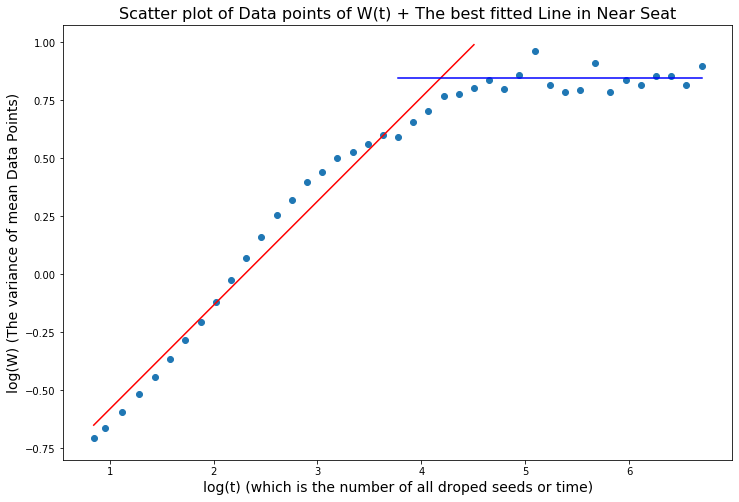

In [79]:
plb.rcParams['figure.figsize'] = 12,8
# Again getting data manually


Data = []
Data1 = [(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.347), (38, 0.396), (53, 0.497), (75, 0.639), (105, 0.804), (147, 0.938), (206, 1.161), (289, 1.432), (404, 1.699), (566, 2.004), (793, 2.415), (1111, 2.743), (1555, 3.132), (2177, 3.199), (3048, 3.613), (4268, 3.554), (5975, 3.628), (8366, 4.313), (11712, 4.911), (16398, 5.214), (22957, 5.083), (32140, 5.289), (44996, 8.488), (62994, 6.134), (88192, 9.821), (123470, 8.213), (172858, 5.04), (242001, 6.002), (338801, 4.702), (474322, 6.604), (664051, 4.472), (929672, 6.845), (1301541, 7.382), (1822157, 5.986), (2551020, 5.697), (3571428, 4.834), (5000000, 6.541)]
Data2=[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.316), (27, 0.375), (38, 0.483), (53, 0.553), (75, 0.672), (105, 0.771), (147, 0.955), (206, 1.207), (289, 1.539), (404, 1.847), (566, 2.028), (793, 2.528), (1111, 2.604), (1555, 3.1), (2177, 3.172), (3048, 3.41), (4268, 3.502), (5975, 3.722), (8366, 5.117), (11712, 6.558), (16398, 7.813), (22957, 8.005), (32140, 7.994), (44996, 4.338), (62994, 6.062), (88192, 4.694), (123470, 9.074), (172858, 11.662), (242001, 5.254), (338801, 7.019), (474322, 5.616), (664051, 7.252), (929672, 10.362), (1301541, 7.807), (1822157, 5.808), (2551020, 5.268), (3571428, 7.866), (5000000, 6.829)]
Data3=[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.361), (38, 0.444), (53, 0.549), (75, 0.615), (105, 0.741), (147, 0.95), (206, 1.166), (289, 1.428), (404, 1.817), (566, 2.291), (793, 2.67), (1111, 2.794), (1555, 3.434), (2177, 3.796), (3048, 3.977), (4268, 5.012), (5975, 4.608), (8366, 5.152), (11712, 5.315), (16398, 6.092), (22957, 6.628), (32140, 5.763), (44996, 6.148), (62994, 4.768), (88192, 5.101), (123470, 7.366), (172858, 5.526), (242001, 7.043), (338801, 8.24), (474322, 13.106), (664051, 4.787), (929672, 4.892), (1301541, 6.346), (1822157, 9.976), (2551020, 12.217), (3571428, 5.559), (5000000, 5.408)]
Data4 =[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.361), (38, 0.409), (53, 0.477), (75, 0.562), (105, 0.734), (147, 0.924), (206, 1.145), (289, 1.4), (404, 1.825), (566, 2.06), (793, 2.413), (1111, 2.901), (1555, 2.966), (2177, 3.365), (3048, 3.609), (4268, 3.874), (5975, 3.734), (8366, 3.643), (11712, 3.465), (16398, 4.369), (22957, 4.141), (32140, 6.378), (44996, 8.558), (62994, 8.317), (88192, 9.249), (123470, 12.066), (172858, 3.843), (242001, 6.034), (338801, 4.866), (474322, 7.118), (664051, 7.869), (929672, 5.495), (1301541, 4.699), (1822157, 6.981), (2551020, 5.44), (3571428, 7.861), (5000000, 13.004)]

for r in range(len(Data1)):
    Data.append((Data1[r][0],(Data1[r][1]+Data2[r][1]+Data3[r][1]+Data4[r][1])/4))
Xs = np.array([d[0] for d in Data])
Ys = np.array([d[1] for d in Data])

plb.scatter(np.log10(Xs),np.log10(Ys),label = "Data points of W(t)")
ConstLine  = np.log10(np.mean(Ys[26:]))
Coeff = np.polyfit(np.log10(Xs[0:25]),np.log10(Ys[0:25]),1)
p = np.poly1d(Coeff)
print(p , 'is the line equation in non saturated area')
print("y = {:.4f} is the line equation in saturated area".format(ConstLine))

plb.plot(np.log10(Xs[0:26]),p(np.log10(Xs[0:26])),c='r',label = "Best fitted line to non Saturated data points")
plb.plot(np.log10(Xs[20:]),[ConstLine]*(len(Data)-20),c='b',label = "Best fitted line to Saturated data points")
plb.title("Scatter plot of Data points of W(t) + The best fitted Line in Near Seat",fontsize=16)
plb.xlabel("log(t) (which is the number of all droped seeds or time)",fontsize=14)
plb.ylabel("log(W) (The variance of mean Data Points)",fontsize=14)

ts = (ConstLine-Coeff[1])/Coeff[0]
ws = p(ts)
print('The collision point is (ts,ws) = ({:.4f},{:.4f})'.format(10**ts,10**ws))

"""
[(7, 0.22), (9, 0.26), (13, 0.292), (19, 0.361), (27, 0.413), (38, 0.455), (53, 0.507), (75, 0.637), (105, 0.829), (147, 1.032), (206, 1.26), (289, 1.562), (404, 1.842), (566, 2.262), (793, 2.492), (1111, 2.826), (1555, 3.076), (2177, 3.08), (3048, 4.014), (4268, 4.022), (5975, 4.859), (8366, 6.761), (11712, 5.831), (16398, 4.029), (22957, 4.839), (32140, 6.372), (44996, 5.832), (62994, 5.577), (88192, 6.511), (123470, 5.219), (172858, 6.933), (242001, 6.547), (338801, 11.286), (474322, 5.167), (664051, 6.895), (929672, 9.674), (1301541, 4.861), (1822157, 8.723), (2551020, 8.484), (3571428, 6.548), (5000000, 7.438)]
[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.361), (38, 0.421), (53, 0.507), (75, 0.629), (105, 0.84), (147, 0.999), (206, 1.218), (289, 1.531), (404, 1.821), (566, 2.169), (793, 2.471), (1111, 2.514), (1555, 2.846), (2177, 3.36), (3048, 3.696), (4268, 4.502), (5975, 5.008), (8366, 4.449), (11712, 5.328), (16398, 5.407), (22957, 6.747), (32140, 9.193), (44996, 7.002), (62994, 7.651), (88192, 5.159), (123470, 13.631), (172858, 7.204), (242001, 5.757), (338801, 8.431), (474322, 6.734), (664051, 5.561), (929672, 9.237), (1301541, 5.398), (1822157, 6.071), (2551020, 7.813), (3571428, 11.083), (5000000, 4.076)]
[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.347), (38, 0.421), (53, 0.517), (75, 0.588), (105, 0.747), (147, 0.926), (206, 1.172), (289, 1.456), (404, 1.693), (566, 1.97), (793, 2.162), (1111, 2.384), (1555, 2.972), (2177, 3.335), (3048, 3.782), (4268, 4.577), (5975, 4.229), (8366, 4.285), (11712, 5.491), (16398, 5.7), (22957, 6.997), (32140, 5.958), (44996, 5.484), (62994, 4.025), (88192, 6.266), (123470, 7.621), (172858, 8.113), (242001, 10.918), (338801, 6.823), (474322, 13.542), (664051, 6.633), (929672, 5.308), (1301541, 6.33), (1822157, 5.58), (2551020, 4.027), (3571428, 5.913), (5000000, 4.878)]
[(7, 0.196), (9, 0.218), (13, 0.255), (19, 0.3), (27, 0.361), (38, 0.436), (53, 0.54), (75, 0.646), (105, 0.772), (147, 0.982), (206, 1.203), (289, 1.371), (404, 1.673), (566, 2.155), (793, 2.277), (1111, 2.509), (1555, 3.005), (2177, 3.225), (3048, 3.528), (4268, 4.08), (5975, 4.219), (8366, 4.024), (11712, 4.891), (16398, 5.564), (22957, 8.17), (32140, 10.93), (44996, 17.106), (62994, 10.637), (88192, 8.159), (123470, 8.551), (172858, 5.103), (242001, 3.461), (338801, 5.225), (474322, 4.461), (664051, 5.727), (929672, 7.501), (1301541, 6.058), (1822157, 6.106), (2551020, 9.985), (3571428, 5.557), (5000000, 9.86)]
"""
# Uncomment it to see scattering plot of W(t)
"""plb.scatter(np.log10(Xs),np.log10(Ys))"""